## Welcome! In this notebook we will explore the results of the 2021 Kaggle Machine Learning (ML) & Data Science (DS) Survey.

#### Every year since 2017, Kaggle has conducted its annual ML and DS survey, an  industry-wide pulse of practitioners of machine learning and data science. The survey asks respondents a variety of questions about their age, gender, country of residence, role and algorithms of choice, to name a few. 

#### This survey is publicly available for analysis and a competition is held annually to showcase participants data storytelling skills using the survey data. The 2021 survey was live from 9/1/2021 to 10/04/2021 and includes responses from 25,973 individuals from 171 countries and territories!

## Step 1: Business Understanding

#### As we dive into the data, we'll focus on the following questions:
- Which countries had respondents from the Accounting/Finance industry? How do these countries rank in their respective percentage of respondents who work in the Accounting/Finance indstry?
-  What ML and DS roles do accounting and finance professionals work in? What programming languages do they prefer and what algorithms are most popular?
- What is the gender profile of all survey respondents and how does the Accounting/Finance industry rank among all other industries in the percentage of respondents who identify as woman, non-binary or something else?

#### A final note before we proceed: As we will see, the data used in this observational analysis is limited to the respondents of the Kaggle survey, is demonstrably skewed and may not be representative of data scientists in the Accounting/Finance industry overall. Nonetheless, it may provide some insight into this cross-section of the professions.

### With that, let's begin!

In [1]:
# load necessary packages
import warnings
import numpy as np
import pandas as pd
import geopandas
from geopandas import plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
plt.rcParams['figure.dpi'] = 110
plt.rcParams['figure.figsize'] = (16,10)
warnings.filterwarnings('ignore')

## Step 2: Data Understanding & Preparation

In [2]:
# Read in the survey data
survey_df = pd.read_csv('./kaggle_survey_2021_responses.csv')
survey_df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [3]:
# Looks like we need to remove the first row, which describes each question
data_dictionary = dict(survey_df.iloc[0])
survey_df = survey_df.drop([0]).reset_index(drop=True)
survey_df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f'The data set consists of {survey_df.shape[0]} respondents and {survey_df.shape[1]} fields')

The data set consists of 25973 respondents and 369 fields


#### Let's check for missing data with regard to question #3: "In which country do you currently reside?"

In [5]:
data_dictionary['Q3']

'In which country do you currently reside?'

In [6]:
print(f"There are {survey_df['Q3'].isna().sum()} missing responses for question #3, country of residence.")

There are 0 missing responses for question #3, country of residence.


#### Great, all survey participants responded with their country of residence. If there were missing entries for country and we wished to use that as one of our predictors in a trained model, we would have to consider dropping or imputing values.

### Let's begin by looking at the geographic distribution of the respondents

In [7]:
# Read the geopandas dataset, which provides the geometry/country mappings we'll use
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [8]:
# Let's check if any countries do or don't overlap between
# the world dataframe and the survey dataframe
x = set(world['name'].sort_values().tolist())
y = set(survey_df['Q3'].sort_values())

In [9]:
# country names in survey data not found in word dataframe
y.difference(x)

{'Czech Republic',
 'Hong Kong (S.A.R.)',
 'I do not wish to disclose my location',
 'Iran, Islamic Republic of...',
 'Other',
 'Singapore',
 'United Kingdom of Great Britain and Northern Ireland',
 'Viet Nam'}

In [10]:
# country names in world dataframe not found in the survey data
x.difference(y)

{'Afghanistan',
 'Albania',
 'Angola',
 'Antarctica',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Rep.',
 'Chad',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Djibouti',
 'Dominican Rep.',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'Gabon',
 'Gambia',
 'Georgia',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Mozambique',
 'Myanmar',
 'N. Cyprus',


#### If we compare the country listings we can see that our survey data does contain Iran, UK and Vietnam, but they are spelled differently than in the world dataframe. Let's change these so they are the same as the world dataframe.

In [11]:
# Change 'United Kingdom of Great Britain and Northern Ireland' to 'United Kingdom'
survey_df.loc[survey_df['Q3'] == 'United Kingdom of Great Britain and Northern Ireland','Q3'] = 'United Kingdom'
survey_df.loc[survey_df['Q3'] == 'Iran, Islamic Republic of...','Q3'] = 'Iran'
survey_df.loc[survey_df['Q3'] == 'Viet Nam','Q3'] = 'Vietnam'

In [12]:
# Next we want to group our respondent count by country
countries_df = survey_df['Q3'].value_counts()
countries_df = countries_df.to_frame().reset_index()
countries_df.columns = ['country','no_of_respondents']

In [13]:
# Let's see the result
countries_df.no_of_respondents.sum()

25973

#### This is unexpected. According the Kaggle survey methodology documentation 171 countries and territories were represented in this survey and we only show 66 countries. If we look at the methodology documentation Kaggle provides separately from this data set, we find that this is explained by the fact that the Kaggle survey administrators grouped countries and territories together in an "Other" category if there were fewer than 50 respondents from a given country. This is done to help preserve anonymity.

### Next we will merge the countries dataframe with the world dataframe to use the geometry mappings

In [14]:
# Remove Antarctica since there were no respondents from there
world = world[world.name!="Antarctica"]

# Merge the two dataframes together
merged_df = world.merge(countries_df, how="left", left_on=['name'], right_on=['country'])
merged_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,no_of_respondents
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,331.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,2650.0


#### Notice the "country" column that we merged these two dataframes on. We can see that this column contains "Not A Number" (NaN) values. This is because we did a left join of the two dataframes with the world dataframe on the left. In other words, we kept the all values in the "name" column of the world dataframe and included any values also in the "country" column of the countries_df (survey data), padding with NaN where "name" did not also appear in the "country" column. 

#### For example, looking above, the country of Tanzania is in the world dataframe, but there were no survey respondents from Tanzania, so the merge operation imputes a NaN. We can simply drop these NaNs in the chloropleth plot below because they do not exist in our source data. Furthermore, we identify these countries that did not have respondents with the region being colored grey.

## Step 3: Analysis and Visualization

### What countries are represented in this survey?

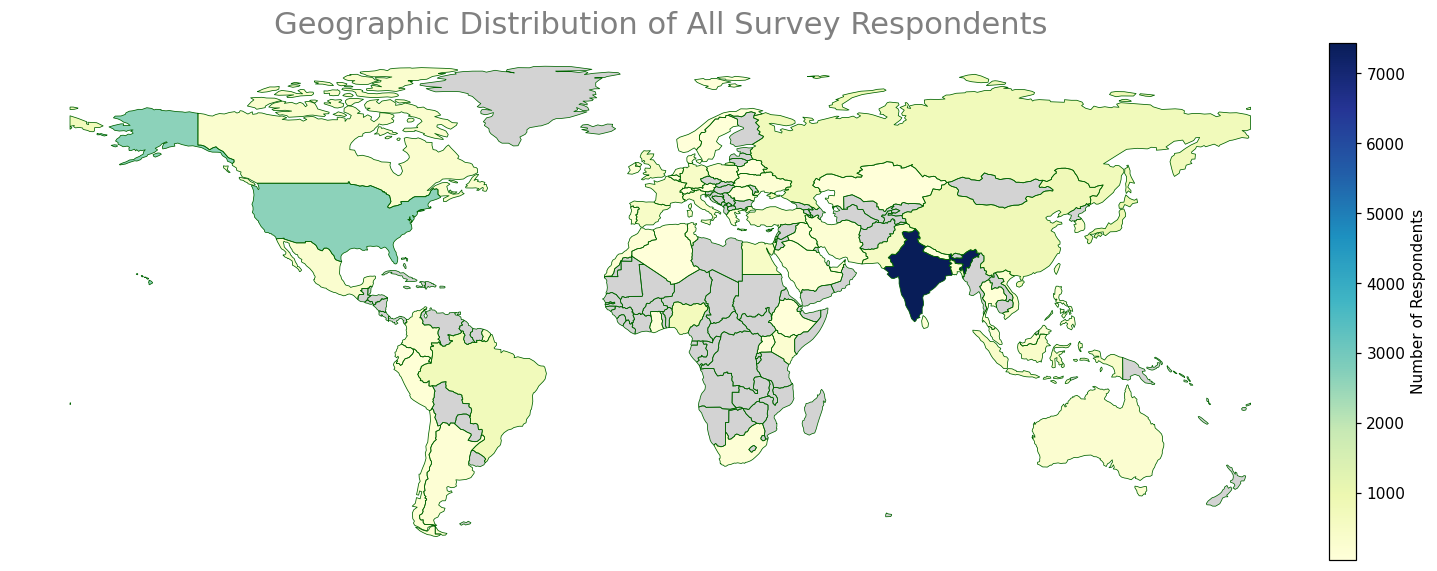

In [15]:
# This block is used to resize the legend
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0)

# color all countries with this line, but gets partially overlayed by subsequent plot
world.plot(ax=ax,color='lightgrey') 
world['geometry'].boundary.plot(ax=ax, color='darkgreen', linewidth=.5)
merged_df.dropna(subset=['country']).plot(column='no_of_respondents', 
                                          ax=ax, 
                                          cax=cax, 
                                          cmap='YlGnBu', 
                                          legend=True, 
                                          legend_kwds={'fmt': '{:.1f}',
                                                       'label':'Number of Respondents'})

ax.set_title('Geographic Distribution of All Survey Respondents', fontsize=20, color='grey')
ax.set_axis_off()

In [16]:
# Add a column with the percentages of total respondents for each country
countries_df['percentage'] = countries_df['no_of_respondents'] / countries_df['no_of_respondents'].sum()
countries_df.sort_values(by='percentage', ascending=False)

,country,no_of_respondents,percentage
0,India,7434,0.286220
1,United States of America,2650,0.102029
2,Other,1270,0.048897
3,Japan,921,0.035460
4,China,814,0.031340
...,...,...,...
61,Kazakhstan,45,0.001733
62,Norway,45,0.001733
63,Algeria,44,0.001694
64,Iraq,43,0.001656


####  India had the largest share of respondents at 28.62%, with the next largest group (10.20%) responding from the United States of America. Let's map the log-scaled number of respondents so that we can see the smaller variations in geographic distribution that are hard to see at this scale.

In [17]:
# Log-scale the number of respondents to see some of the smaller variations in geographic distribution
merged_df['log_respondents'] = np.log(merged_df.no_of_respondents)

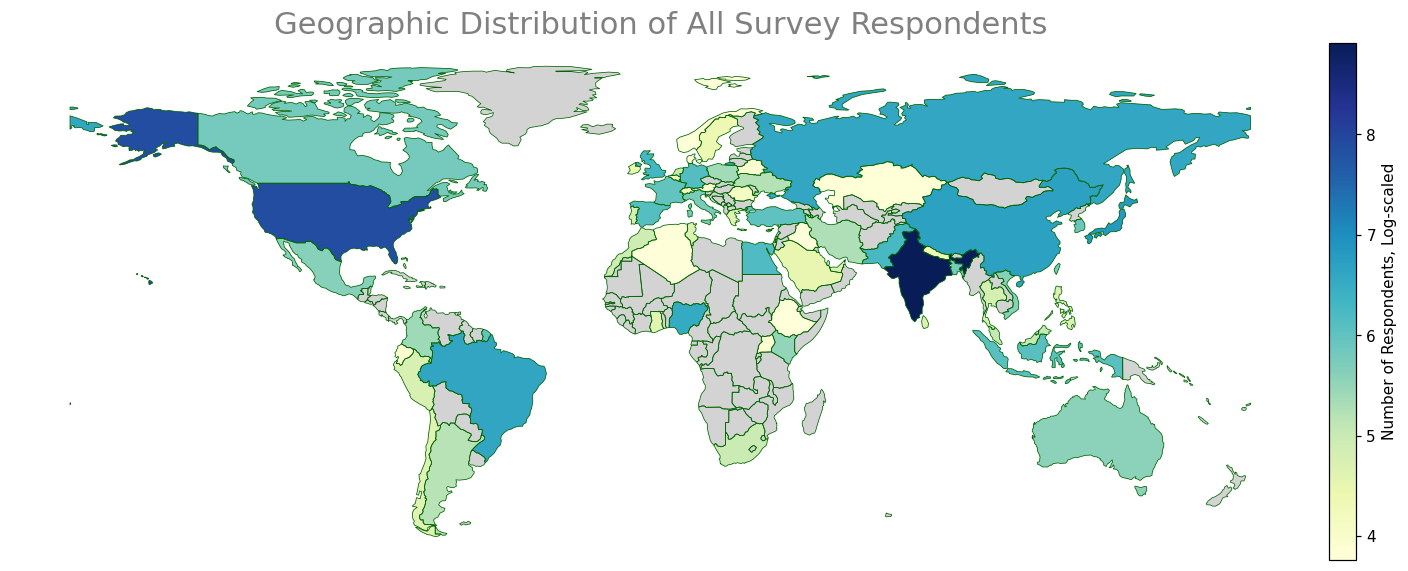

In [18]:
# This block is used to resize the legend
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0)

# color all countries with this line, but gets partially overlayed by subsequent plot
world.plot(ax=ax,color='lightgrey') 
world['geometry'].boundary.plot(ax=ax, color='darkgreen', linewidth=.5)
merged_df.dropna(subset=['country']).plot(column='log_respondents', 
                                          ax=ax, 
                                          cax=cax, 
                                          cmap='YlGnBu', 
                                          legend=True, 
                                          legend_kwds={'fmt': '{:.1f}',
                                                       'label':'Number of Respondents, Log-scaled'})

ax.set_title('Geographic Distribution of All Survey Respondents', fontsize=20, color='grey')
ax.set_axis_off()

#### After log-scaling we can see that after India and the U.S.A, the countries that follow in number of respondents are Brazil, Russia, China, Japan, UK, Nigeria, Egypt, and Pakistan. We could also look at this using a bar plot.

### Which twenty countries had the most survey respondents?

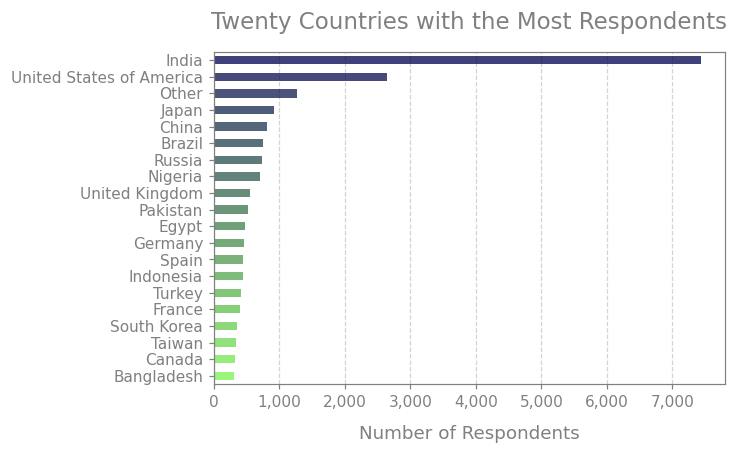

In [19]:
# plot the twenty countries with the most respondents
plt.figure(figsize=(6,4))
plt.tight_layout()
countries_df = survey_df['Q3'].value_counts()
countries_df = countries_df[:20].sort_values()

# make a color map with a gradient along the Red/Green dimensions
colors = [(x/40.0, x/20.0, 0.3) for x in list(range(len(countries_df)))[::-1]]

with plt.rc_context({'axes.edgecolor':'grey', 'xtick.color':'grey', 'ytick.color':'grey'}):
    ax = countries_df.plot(kind='barh', color=colors, alpha=.75)
    ax.set_xlabel('Number of Respondents',fontsize=12, color='grey', labelpad=10)
    ax.set_title('Twenty Countries with the Most Respondents', fontsize=15, color='grey', pad=15)
    ax.set_axisbelow(True)
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.grid(color='lightgray', linestyle='--');

### What about the twenty countries with the least respondents?

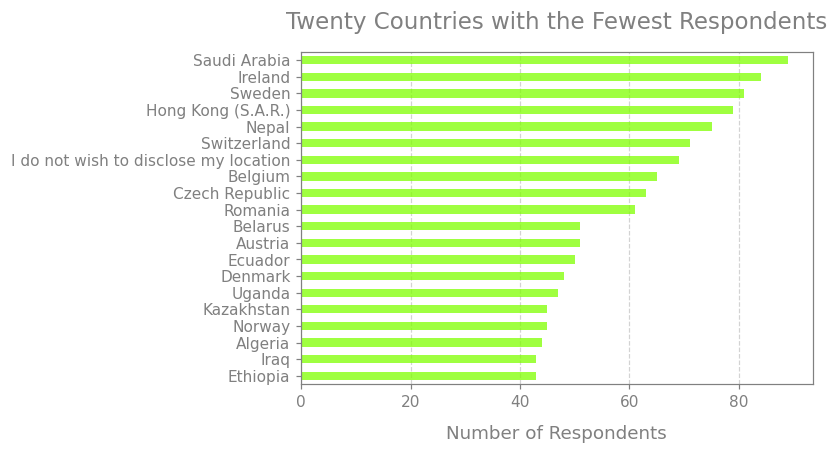

In [20]:
# plot the twenty countries with the most respondents
plt.figure(figsize=(6,4))
plt.tight_layout()
countries_df = survey_df['Q3'].value_counts()
countries_df = countries_df[-20:].sort_values()

with plt.rc_context({'axes.edgecolor':'grey', 'xtick.color':'grey', 'ytick.color':'grey'}):
    ax = countries_df.plot(kind='barh', color='chartreuse', alpha=.75)
    ax.set_xlabel('Number of Respondents',fontsize=12, color='grey', labelpad=10)
    ax.set_title('Twenty Countries with the Fewest Respondents', fontsize=15, color='grey', pad=15)
    ax.set_axisbelow(True)
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.grid(color='lightgray', linestyle='--');

### Which industries are represented by survey respondents? How many are from Accounting/Finance?

#### Let's check for missing responses for question #20, "In what industry is your current employer/contract (or your most recent employer if retired)?"

In [21]:
print(f'There are {survey_df["Q20"].isna().sum()} missing responses for question #20, industry.')

There are 9648 missing responses for question #20, industry.


#### Let's see how many of these missing responses for industry are explained by the respondent identifying as "Student" or "Currently not employed"

In [22]:
remaining_na = survey_df[(survey_df['Q5'] != 'Student') & (survey_df['Q5'] != 'Currently not employed')]['Q20'].isna().sum()
print('After removing respondents who identify as "Student" or "Currently not employed"')
print(f'the number of missing responses for industry is reduced to {remaining_na}.')

After removing respondents who identify as "Student" or "Currently not employed"
the number of missing responses for industry is reduced to 858.


#### Notice that most of the missing values for industry of employment are explained by respondents who are students or currently not employed. This is logical. It is worth noting that the value_counts() method used here and throughout this notebook automatically excludes observations that are NaN or missing. 

#### As previously mentioned, if there are missing measurements on a feature we wish to use to train a model, we would need to consider dropping or imputing values. However, in this notebook we are only concerned with exploring the available responses rather than learning a model. For this reason, we believe it is justified to ignore observations with missing values for a given variable of interest, be it industry, programming language, algorithms, or gender.

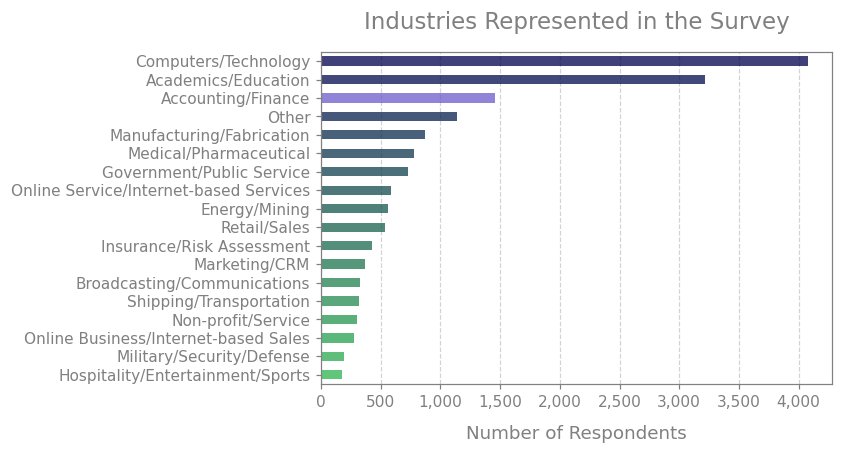

In [23]:
# proportion of each industry that represented by the responses
plt.figure(figsize=(6,4))
plt.tight_layout()
industry_df = survey_df['Q20'].value_counts()
industry_df = industry_df.sort_values()

# make a color map with a gradient along the Red/Green dimensions
colors = [(x/100.0, x/24.0, 0.3) for x in list(range(len(industry_df)))[::-1]] 
colors[15] = (.42, .35, .80) #rgb combo for slateblue

with plt.rc_context({'axes.edgecolor':'grey', 'xtick.color':'grey', 'ytick.color':'grey'}):
    ax = industry_df.plot(kind='barh', color=colors, alpha=.75)
    ax.set_xlabel('Number of Respondents',fontsize=12, color='grey', labelpad=10)
    ax.set_title('Industries Represented in the Survey', fontsize=15, color='grey', pad=15)
    ax.set_axisbelow(True)
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.grid(color='lightgray', linestyle='--');

In [24]:
count_acct = survey_df[survey_df['Q20'] == 'Accounting/Finance'].shape[0]
print(f'{count_acct} respondents are from the Accounting/Finance industry')

1459 respondents are from the Accounting/Finance industry


#### We can see that respondents in the Accounting/Finance industry are the third largest group from the survey, comprised of 1,459 respondents. Let's take a closer look at this population within the survey data. We could start by plotting the geographic distribution of accounting and finance professionals.

In [25]:
# Create a df of just accounting/finance
df_acct = survey_df[survey_df['Q20'] == 'Accounting/Finance']

### Which countries had respondents in the Accounting/Finance industry?

In [26]:
# Group our accounting and finance professionals count by country and merge with the world df
acct_geo = df_acct['Q3'].value_counts()
acct_geo = acct_geo.to_frame().reset_index()
acct_geo.columns = ['country','no_of_respondents']
merged_df_acct = world.merge(acct_geo, how="left", left_on=['name'], right_on=['country'])

# Log-scale the number of respondents to see some of the smaller variations in geographic distribution
merged_df_acct['log_respondents'] = np.log(merged_df_acct.no_of_respondents)

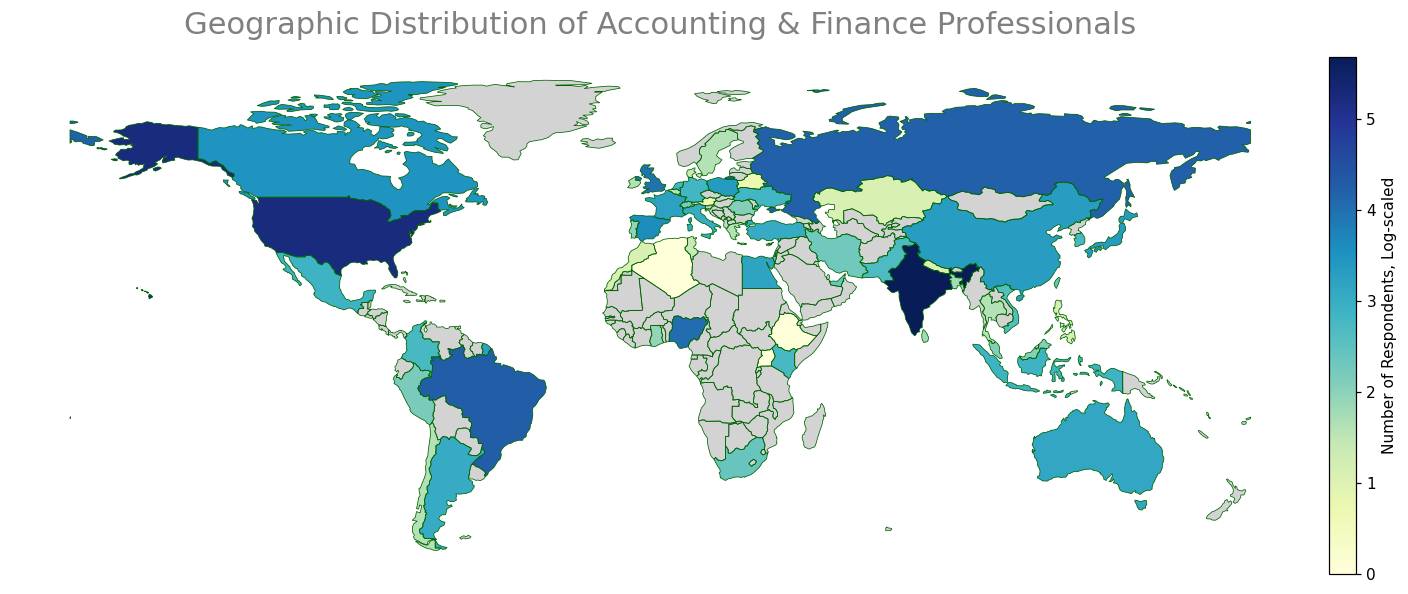

In [27]:
# This block is used to resize the legend
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0)

# color all countries with this line, but gets partially overlayed by subsequent plot
world.plot(ax=ax,color='lightgrey') 
world['geometry'].boundary.plot(ax=ax, color='darkgreen', linewidth=.5)
merged_df_acct.dropna(subset=['country']).plot(column='log_respondents', 
                                          ax=ax, 
                                          cax=cax, 
                                          cmap='YlGnBu', 
                                          legend=True, 
                                          legend_kwds={'fmt': '{:.1f}',
                                                       'label':'Number of Respondents, Log-scaled'})

ax.set_title('Geographic Distribution of Accounting & Finance Professionals', fontsize=20, color='grey', pad=15)
ax.set_axis_off()

#### It looks like there are finance and accounting professionals from apparently all but a few countries that had respondents to the survey. Specifically, with the code below we can see Ecuador, Iraq, Norway and Saudi Arabia were the only countries with survey respondents not from the Accounting/Finance industry:

In [28]:
# Check which respondent countries did not have accounting/finance representation
acct_respondent_countries = set(merged_df_acct.dropna(subset=['country'])['country'])
all_respondent_countries = set(merged_df.dropna(subset=['country'])['country'])

print(f'Professionals from the Accounting/Finance industry represent {len(acct_respondent_countries)} different countries\n')
print('The countries that did not have respondents from the Accounting/Finance industry include:\n')
print(all_respondent_countries.difference(acct_respondent_countries))

Professionals from the Accounting/Finance industry represent 57 different countries

The countries that did not have respondents from the Accounting/Finance industry include:

{'Iraq', 'Ecuador', 'Norway', 'Saudi Arabia'}


### How do countries rank in the percentage of respondents in the Accounting/Finance industry?

In [29]:
# Create df with the percentage of respondents from Accounting/Finance industry for each country
proportion_acct_df = df_acct['Q3'].value_counts() / survey_df['Q3'].value_counts()
print('Percentage of respondents in Accounting/Finance industry by country (top ten):')
proportion_acct_df.sort_values(ascending=False).head(10)

Percentage of respondents in Accounting/Finance industry by country (top ten):


Poland                  0.132420
Romania                 0.131148
Switzerland             0.126761
Hong Kong (S.A.R.)      0.126582
Argentina               0.115385
Netherlands             0.111111
Canada                  0.099698
United Arab Emirates    0.099099
United Kingdom          0.098182
Brazil                  0.093209
Name: Q3, dtype: float64

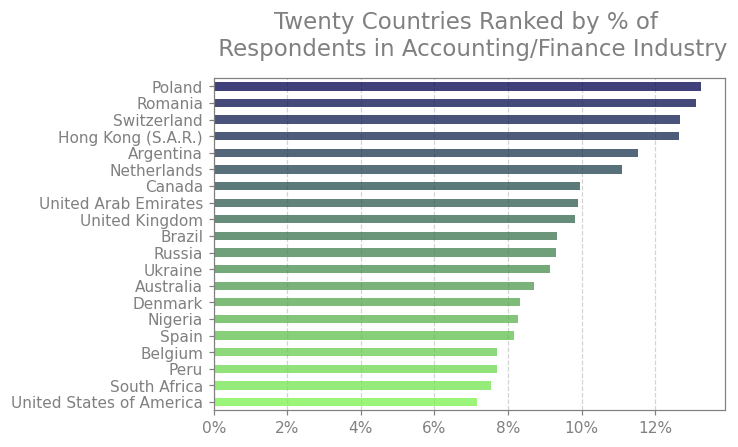

In [30]:
# Plot the twenty countries with the greatest % of respondents from Accounting/Finance industry
plt.figure(figsize=(6,4))
plt.tight_layout()
proportion_acct_df = df_acct['Q3'].value_counts() / survey_df['Q3'].value_counts()
proportion_acct_df = proportion_acct_df.sort_values(ascending=False)[:20] * 100
proportion_acct_df = proportion_acct_df.sort_values()

# make a color map with a gradient along the Red/Green dimensions
colors = [(x/40.0, x/20.0, 0.3) for x in list(range(len(proportion_acct_df)))[::-1]]

with plt.rc_context({'axes.edgecolor':'grey', 'xtick.color':'grey', 'ytick.color':'grey'}):
    ax = proportion_acct_df.plot(kind='barh', color=colors, alpha=.75)
    ax.set_title('Twenty Countries Ranked by % of \n Respondents in Accounting/Finance Industry', fontsize=15, color='grey', pad=15)
    fmt = '%.0f%%'
    xticks = mtick.FormatStrFormatter(fmt)
    ax.xaxis.set_major_formatter(xticks)
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='lightgrey', linestyle='--');

### Let's see what this looks like on the map:

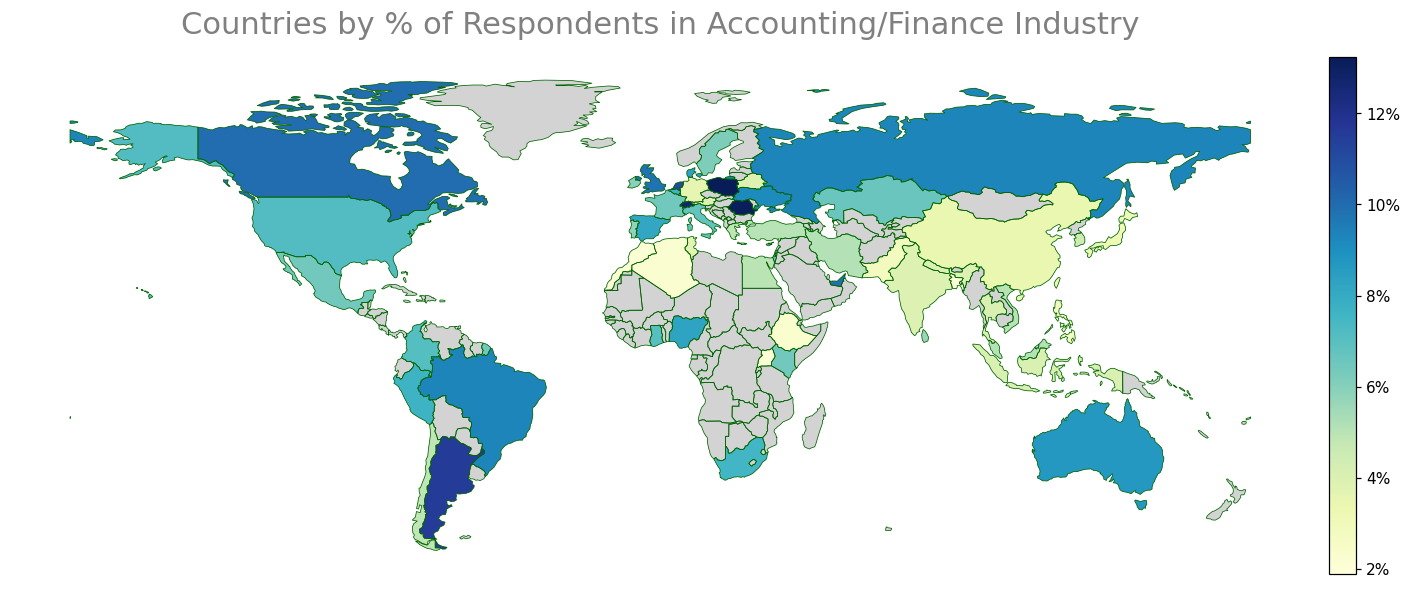

In [31]:
# Map the countries by % of respondents from Accounting/Finance industry
acct_geo = df_acct['Q3'].value_counts() / survey_df['Q3'].value_counts() * 100.0
acct_geo = acct_geo.to_frame().reset_index()
acct_geo.columns = ['country','percent_acct']
merged_df_acct = world.merge(acct_geo, how="left", left_on=['name'], right_on=['country'])

# This block is used to resize the legend
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0)

# color all countries with this line, but gets partially overlayed by subsequent plot
world.plot(ax=ax,color='lightgrey') 
world['geometry'].boundary.plot(ax=ax, color='darkgreen', linewidth=.5)
merged_df_acct.dropna(subset=['country']).plot(column='percent_acct', 
                                          ax=ax, 
                                          cax=cax, 
                                          cmap='YlGnBu', 
                                          legend=True, 
                                          legend_kwds={'format': '%.0f%%'})

ax.set_title('Countries by % of Respondents in Accounting/Finance Industry', fontsize=20, color='grey', pad=15)
ax.set_axis_off()

In [32]:
proportion_acct_df = df_acct['Q3'].value_counts() / survey_df['Q3'].value_counts()
rank_us = proportion_acct_df.sort_values(ascending=False).index.get_loc('United States of America') + 1
rank_india = proportion_acct_df.sort_values(ascending=False).index.get_loc('India') + 1
print(f'India ranks {rank_india} and the USA ranks {rank_us} of the 57 countries with repondents who work\n'
        'with machine learning and data science in the Accounting/Finance industry.')

India ranks 46 and the USA ranks 20 of the 57 countries with repondents who work
with machine learning and data science in the Accounting/Finance industry.


#### Looking at this data this way, we are able to see a different perspective. The top five countries with the highest respective percentage of respondents who are machine learning and data science practitioners in the Accounting/Finance industry are:

1. Poland (13.24%)
2. Romania (13.11%)
3. Switzerland (12.68%)
4. Hong Kong (S.A.R.) (12.66%)
5. Argentina (11.54%)

#### The United State of America ranks 20th at 7.17%, while India ranks 46th at 3.96% in this regard.

### What are the roles of accounting and finance professionals working with data? How does this compare to all other industries?

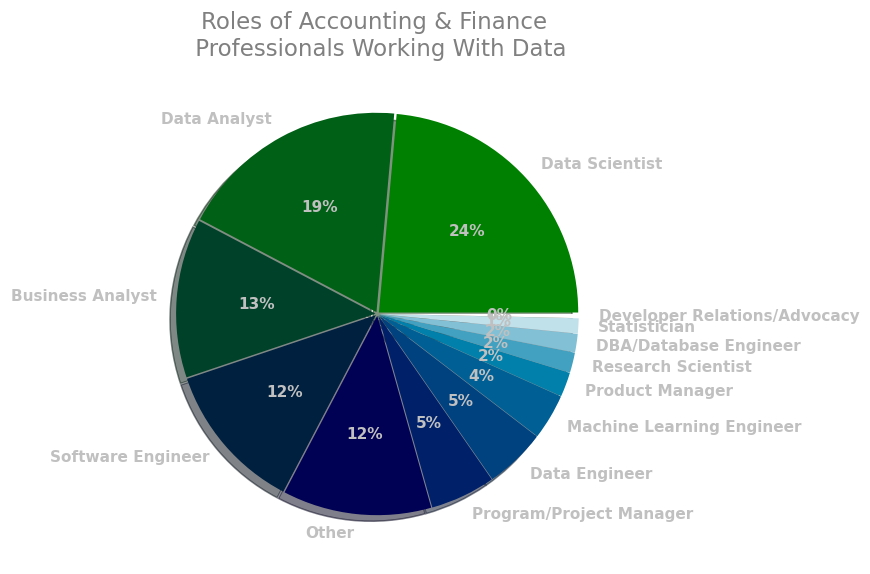

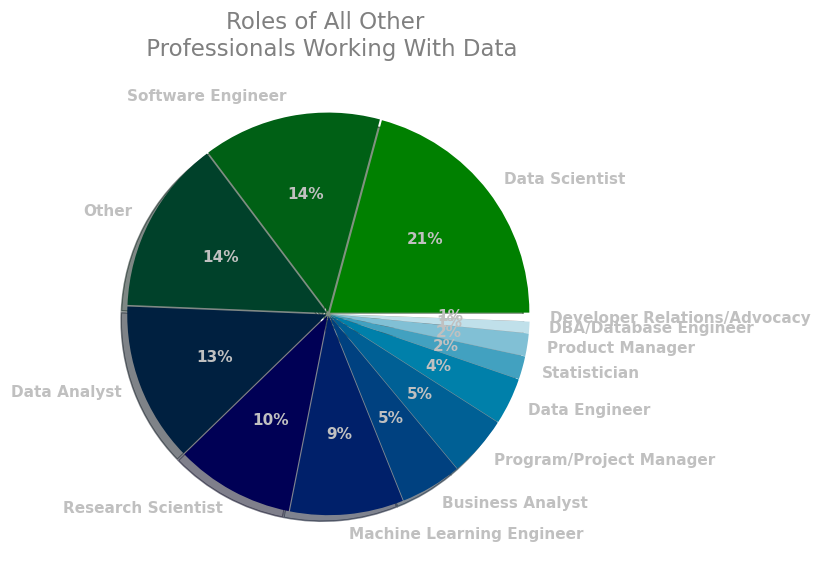

In [33]:
acct_roles = df_acct['Q5'].value_counts() / df_acct.shape[0]
non_acct_roles = survey_df[(survey_df['Q20'] != 'Accounting/Finance') & \
                           (survey_df['Q5'] != 'Student') & \
                           (survey_df['Q5'] != 'Currently not employed')]['Q5'].value_counts()

non_acct_roles = non_acct_roles / non_acct_roles.sum()

# Specify plot parameters
explode1 = [0.01 for i in range(acct_roles.shape[0])]
explode2 = [0.01 for i in range(non_acct_roles.shape[0])]
fig, ax = plt.subplots()

# Plot roles amount accounting and finance
plt.figure(0)
ax = acct_roles.plot.pie(figsize=(8,6), cmap='ocean', explode=explode1, fontsize=10, autopct='%.0f%%', 
                textprops={'color':'silver','weight':'bold'}, shadow=True)
ax.set_title('Roles of Accounting & Finance \n Professionals Working With Data', color='grey', fontsize=15)
ax.set_ylabel('')

# Plot roles among non-acct, non-finance
plt.figure(1)
ax = non_acct_roles.plot.pie(figsize=(8,6), cmap='ocean', explode=explode2, fontsize=10, autopct='%.0f%%', 
                textprops={'color':'silver','weight':'bold'}, shadow=True)
ax.set_title('Roles of All Other \n Professionals Working With Data', color='grey', fontsize=15)
ax.set_ylabel('');

#### It is encouraging to see that accounting and finance professionals work with data in a variety of roles, with the top three being Data Scientist, Data Analyst and Business Analyst. What might be surprising is that this range of roles also includes Software Engineer, Data Engineer and Machine Learning Engineer. 

#### Are these the roles you typically think of when you think of accounting or finance? It seems this is the direction the industry is headed.

#### The second pie plot above represents the proportion of roles held by all other respondents outside of the Accounting/Finance industry. Perhaps the most pronounced difference is that Software Engineer, Research Scientist and Machine Learning Engineer are less common roles among accounting and finance professionals. Not surprisingly, Business Analyst is more common among them.

### What programming languages do accounting and finance professionals use?

#### Per the Kaggle survey methodology documentation, "Responses to multiple selection questions (multiple choices can be selected) were split into multiple columns (with one column per answer choice)." Thus, to use this data we will need to aggregate the instances of each question part to quantify use of programming languages. We will define a function here to do that. We'll also use this function to analyze the following question regarding algorithms used by respondents.

In [34]:
# Define a function to help aggregate multi-selection survey question responses
def agg_multi_response(df, question_parts):
    '''
    Function to aggregate the responses from multiple selection survey questions
    
    Input Params:
        [1] df - pandas Dataframe, containing columns for each of the expanded multiple selection questions
        [2] question_parts - list, containing strings for the column headers of the expanded multiple selection questions
        
    Outputs:
        [1] result - pandas Series, containing index (row) for each option from the multiple selection question
                     and values counts for each index
    '''
    result = {f'{list(dict(df[lang].value_counts()))[0]}':f'{list(df[lang].value_counts())[0]}' for lang in question_parts}
    result = pd.DataFrame([result]).T
    result = pd.to_numeric(result[0])
    return result

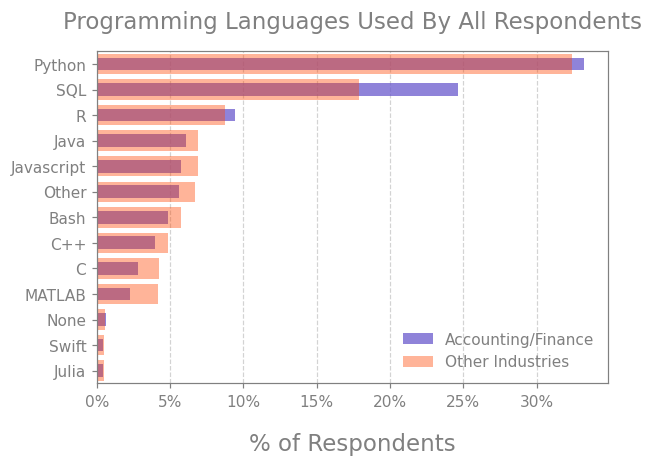

In [35]:
prog_langs = ['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4','Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 
             'Q7_Part_8', 'Q7_Part_9','Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER']

acct_langs = agg_multi_response(df_acct, prog_langs)
acct_langs = acct_langs / acct_langs.sum() * 100

non_acct_df = survey_df[(survey_df['Q20'] != 'Accounting/Finance') & \
                           (survey_df['Q5'] != 'Student') & \
                           (survey_df['Q5'] != 'Currently not employed')]

non_acct_langs = agg_multi_response(non_acct_df, prog_langs)
non_acct_langs = non_acct_langs / non_acct_langs.sum() * 100

with plt.rc_context({'axes.edgecolor':'grey', 'xtick.color':'grey', 'ytick.color':'grey'}):
    ax = acct_langs.sort_values().plot(kind='barh',figsize=(6,4), fontsize=10, color='slateblue', alpha=.75, label='Accounting/Finance', stacked=True)
    ax.barh(y=non_acct_langs.index, width=non_acct_langs.sort_values(), color='orangered', label='Other Industries', alpha=.4)
    ax.set_title('Programming Languages Used By All Respondents', fontsize=15, color='grey', pad=15)
    ax.set_xlabel('% of Respondents', fontsize=15, color='grey', labelpad=15)
    ax.set_ylabel('')
    ax.legend(frameon=False, labelcolor='grey')
    ax.set_axisbelow(True)
    fmt = '%.0f%%'
    xticks = mtick.FormatStrFormatter(fmt)
    ax.xaxis.set_major_formatter(xticks)
    ax.xaxis.grid(color='lightgray', linestyle='--');

#### Python and SQL are the most popular languages amount accounting and finance professionals and are used more in this industry than in others. R, Java and Javascript are the next most popular. It would be interesting to know how these respondents apply these languages in practice. Let's see if the algorithms of choice provide us with any insight in this regard:

### What algorithms are accounting and finance professionals using?

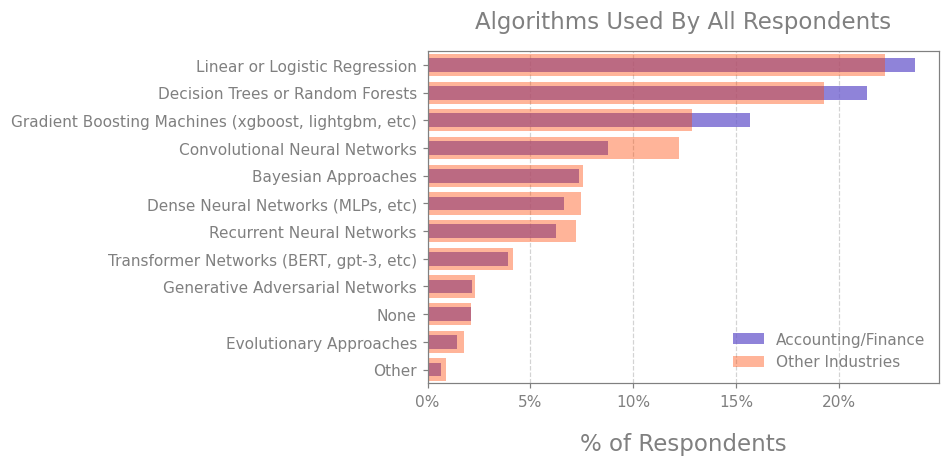

In [36]:
methods = ['Q17_Part_1','Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5','Q17_Part_6', 
        'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9','Q17_Part_10', 'Q17_Part_11', 'Q17_OTHER']

acct_methods = agg_multi_response(df_acct, methods)
acct_methods = acct_methods / acct_methods.sum() * 100

non_acct_methods = agg_multi_response(non_acct_df, methods)
non_acct_methods = non_acct_methods / non_acct_methods.sum() * 100

with plt.rc_context({'axes.edgecolor':'grey', 'xtick.color':'grey', 'ytick.color':'grey'}):
    ax = acct_methods.sort_values().plot(kind='barh',figsize=(6,4), fontsize=10, color='slateblue', alpha=.75, label='Accounting/Finance', stacked=True)
    ax.barh(y=non_acct_methods.index, width=non_acct_methods.sort_values(), color='orangered', label='Other Industries', alpha=.4)
    ax.set_title('Algorithms Used By All Respondents', fontsize=15, color='grey', pad=15)
    ax.set_xlabel('% of Respondents', fontsize=15, color='grey', labelpad=15)
    ax.set_ylabel('')
    ax.legend(frameon=False, labelcolor='grey')
    ax.set_axisbelow(True)
    fmt = '%.0f%%'
    xticks = mtick.FormatStrFormatter(fmt)
    ax.xaxis.set_major_formatter(xticks)
    ax.xaxis.grid(color='lightgray', linestyle='--');

#### Accounting and finance professionals utilize a a wide range of algorithms, with regression, tree-based, and gradient boosting techniques being used more in this industry than others. Even more sophisticated techniques like neural networks and transformers are being used in this industry.

#### As a professional working in public accounting, I am surprised to see this as these are not techniques that I would think are widely applied in our industry. However, my sense is that this is changing.

### Now let's take a look at gender. What is the gender profile of all respondents?

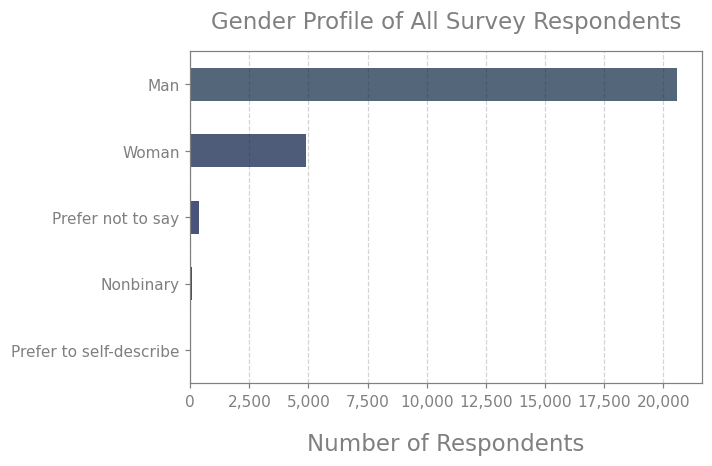

In [37]:
gender_df = survey_df['Q2'].value_counts()

# make a color map with a gradient along the Red/Green dimensions
colors = [(x/40.0, x/20.0, 0.3) for x in range(len(gender_df))]

with plt.rc_context({'axes.edgecolor':'grey', 'xtick.color':'grey', 'ytick.color':'grey'}):
    ax = gender_df.sort_values().plot(kind='barh',figsize=(6,4), cmap='ocean', fontsize=10, color=colors, alpha=.75)
    ax.set_title('Gender Profile of All Survey Respondents', fontsize=15, color='grey', pad=15)
    ax.set_xlabel('Number of Respondents', fontsize=15, color='grey', labelpad=15)
    ax.set_ylabel('')
    ax.set_axisbelow(True)
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.grid(color='lightgray', linestyle='--');

In [38]:
# Percentage of respondents by gender
gender_df / gender_df.sum()

Man                        0.793054
Woman                      0.188272
Prefer not to say          0.013668
Nonbinary                  0.003388
Prefer to self-describe    0.001617
Name: Q2, dtype: float64

#### The survey respondents are overwhelmingly individuals who identify as 'Man', which represent ~80% of respondents. This is consistent with the ongoing issue of the gender gap experienced across a ride variety of disciplines and professions related to Science, Technology, Math and Engineering (STEM).

### How do the industries rank in terms of percentage of respondents who identify as 'Woman', 'Non-Binary', 'Prefer to self-describe' and 'Prefer not to say' who are also working in the Data Science role?

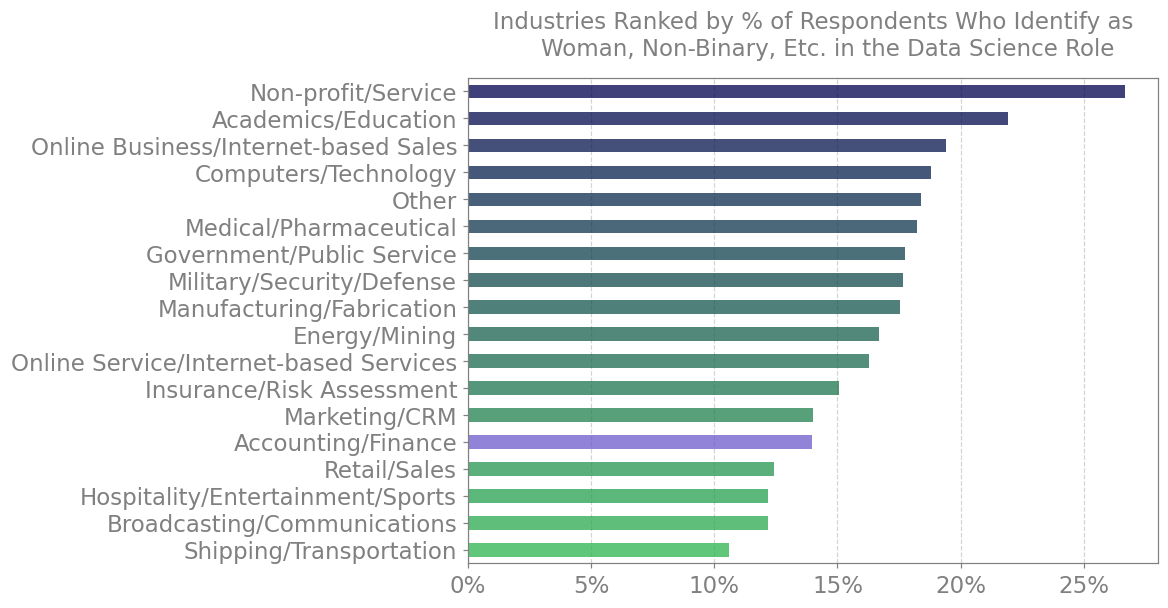

In [39]:
# filter the data to see how accounting/finance industry compares to other industries in representation 
# of repsondents that identified as woman or non-binary in repsonse to the question of gender

dsdf = survey_df[survey_df['Q5']=='Data Scientist']
gender_series = dsdf.groupby(['Q20'])['Q2'].value_counts() / dsdf.groupby(['Q20'])['Q2'].count() * 100
gender_series = gender_series.unstack().drop('Man', axis=1).sum(axis=1).sort_values()

colors = [(x/100.0, x/24.0, 0.3) for x in list(range(len(gender_series)))[::-1]]
colors[4] = (.42, .35, .80) #rgb combo for slateblue

# plot data
with plt.rc_context({'axes.edgecolor':'grey', 'xtick.color':'grey', 'ytick.color':'grey'}):
    fig, ax = plt.subplots(figsize=(7,5))
    fig.tight_layout()
    ax = gender_series.plot(kind='barh', fontsize=15, color=colors, alpha=.75)
    ax.set_ylabel('')
    ax.set_title('Industries Ranked by % of Respondents Who Identify as\n\
    Woman, Non-Binary, Etc. in the Data Science Role', color='grey', fontsize=15, pad=15)
    fmt = '%.0f%%'
    xticks = mtick.FormatStrFormatter(fmt)
    ax.xaxis.set_major_formatter(xticks)
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='lightgray', linestyle='--');

#### As we can see, while individuals who identify as woman, non-binary, etc. are underrepresented overall, this is especially true for Accounting/Finance professionals in the Data Science role, ranking at 14 among the 18 industry categories. There is still a lot more work to be done to achieve gender equality for Data Scientists in the Accounting/Finance industry.

## Step 4: Evaluate the Results

### In this notebook we looked at the 2021 Kaggle Machine Learning & Data Science Survey results and highlighted professionals in the Accounting/Finance industry, the third largest industry group represented in the survey.

### We learned that this subset of data science and machine learning practitioners represent 57 countries and work primarily in the role of Data Scientist, Data Analyst and Business Analyst. These individuals tend to use Python and SQL more than other programming languages and apply regression and tree-based algorithms more than neural networks or transformers. It would be interesting to know the specific use cases behind these applications.

### This reflects the direction the industry is headed. Whether you are in public accounting or work in industry as an accountant or finance professional, if you have yet to explore these tools and techniques, I strongly encourage you to check them out and follow your curiosity.

### Our final key take away is that in terms of gender representation the Accounting/Finance industry ranks relatively low (14 of 18) compared to other industries in the % of Data Scientists who identify as Woman, Non-binary, Preferred to self-describe and Preferred not to say. This highlights the persistent lack of gender equality for the role of Data Scientist within the Accounting/Finance profession.

### While these findings are observational and limited to the respondents of the Kaggle survey, they do provide a glimpse into the state of the industry.